In [82]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 3000


In [51]:
dfY = pd.read_csv('arteria.csv', sep=';')
dfY = dfY[['ID', 'Y']]


In [83]:
dfY.head()

,ID,Y
0,5410100101,0
1,5460202401,1
2,5460102001,1
3,5470102101,1
4,5450403501,1


In [94]:
df = pd.read_csv('food_data.csv', sep=',', index_col= [0])
df.ID = df.ID.replace(regex={r'-': ''})
df = df.astype({"ID": 'int64'})

In [97]:
len(cols)

737

In [98]:
df = df[:368]

In [95]:
cols = df.columns
for i in range(1, len(cols)):
  name = cols[i]
 # name2 = name+'_cat'
  df = df.astype({name: 'category'})
  df[name] = df[name].cat.codes

In [96]:
df.head()

,ID,1. Молоко до 1%_x,"2. Молоко до 2,5%_x",3. Молоко более 3%_x,4. Сгущенка_x,5. Кефир до 1%_x,"6. Кефир до 2,5%_x",7. Кефир более 3%_x,8. Йогурт до 1%_x,"9. Йогурт до 2,5%_x",10. Йогурт более 3%_x,11. Творог до 5%_x,12. Творог более 5%_x,13. Сырки_x,14. Творожники_x,15. Сметана до 15%_x,16. Сметана более 20%_x,17. Сыр мягкий_x,18. Сыр до 25%_x,19. Сыр более 25%_x,20. Маргарин_x,21. Масло бутербр._x,22. Мороженное_x,23. Бананы_x,24. Ягоды_x,25. Киви_x,26. Груша_x,27. Клубника_x,28. Сухофрукты_x,29. Изюм_x,30. Ананас_x,31. Яблоко_x,32. Грейпфрут_x,33. Виноград_x,34. Мандарин_x,35. Лимон_x,36. Апельсин_x,37. Персик_x,38. Слива_x,39. Персик в сезон_x,40. Сливы в сезон_x,41. Абрикосы в сезон_x,42. Арбуз в сезон_x,43. Мандарины в сезон_x,44. Черешня в сезон_x,45. Клубника в сезон_x,46. Ягоды в сезон_x,47. Капуста свежая_x,48. Капуста приготов._x,49. Цветная капуста свежая_x,50. Цветная капуста пригот._x,51. Морковь свежая_x,52. Морковь пригот._x,53. Свекла_x,54. Сельдерей_x,55. Огурец_x,"56. Салат, руккол_x","57. Петрушка, укроп_x",58. Горох свежий_x,59. Горох пригот._x,60. Бобы_x,61. Фасоль_x,62. Чечевица_x,63. Овощной салат_x,64. Окрошка_x,65. Винегрет_x,66. Зеленый лук свежий_x,67. Зеленый лук пригот._x,68. Томаты свежие_x,69. Томаты пригот._x,70. Перец пригот._x,71. Грибы_x,72. Капуста квашеная_x,73. Шпинат_x,74. Кабачок_x,75. Тыква_x,76. Кукуруза_x,77. Горох конс._x,78. Маринады_x,79. Баклажан_x,80. Брокколи_x,81. Тыква в сезон_x,82. Кабачок в сезон_x,83. Перец в сезон_x,84. Редис в сезон_x,85. Грибы в сезон_x,86. Капуста квашеная в сезон_x,87. Яйца_x,88. Курица с кожей_x,89. Курица без кожи_x,90. Мясо в сложном блюде_x,"91. Туш. Говядина, гуляш_x",92. Стейк из говядины_x,93. Котлета_x,94. Свинина тушеная_x,95. Свинина жареная_x,96. Баранина_x,"97. Рыба жареная, суп_x","98. Рыба вяленая, соленая_x",99. Морепродукты_x,100. Пирожки с мясом_x,101. Куринный рулет_x,102. Сосиськи_x,103. Колбаса вареная_x,104. Колбаса копченая_x,"105. Буженина, окорок, ветчина_x",106. Сало_x,107. Субпродукты_x,108. Картофель_x,109. Паста_x,110. Белый хлеб_x,111. Черный хлеб_x,112. Серый хлеб_x,113. Рис_x,114. Картофель во фритюре_x,115. Вареники_x,116. Пельмени_x,117. Пицца_x,118. Гречневая крупа_x,119. Манная каша_x,120. Хлопья_x,121. Овсянная круппа_x,122. Пшено_x,123. Прочие злаки_x,124. Борщ_x,125. Бульон_x,126. Рассольник_x,127. Суп с овощами_x,128. Грибной суп_x,129. Гороховый суп_x,130. Куринный суп с лапшой_x,131. Соки_x,132. Кофе_x,133. Чай_x,134. Вода_x,135. Газировка_x,136. Безалкогольные напитки_x,137. Пиво_x,138. Вино_x,"139. Водка, коньяк, ликер_x",140. Квас_x,141. Блины_x,142. Булочка_x,"143. Сушки, баранки_x",144. Конфеты шоколад._x,145. Конфеты карамель_x,146. Торт_x,147. Халва_x,148. Печенье_x,"149. Мед, джем, варенье_x",150. Шоколад_x,151. Бисквит_x,152. Пряники_x,"153. Пастила, зефир_x",154. Вафли_x,155. Чипсы_x,156. Сухарики_x,157. Орехи_x,158. Майонез_x,159. Кетчуп_x,160. Соевый соус_x,161. Витамины в таблетках_x,162. Минералы в таблетках_x,163. Витамин А_x,164. Витамин D_x,165. Витамин Е_x,166. Витамин В_x,167. Витамин C_x,168. Кальций_x,169. Железо_x,170. Цинк_x,171. Йод_x,172. Магний_x,173. Рыбий жир_x,174. Поливитамины_x,175. Соевое масло_x,176. Кукурузное масло_x,177. Растительное масло_x,178. Подсолнечное масло_x,179. Рапсовое масло_x,180. Хлопковое масло_x,181. Оливковое масло_x,182. Сливочное масло_x,183. Питание в ресторанах_x,184. Добавление соли_x,1. Молоко до 1%_y,"2. Молоко до 2,5%_y",3. Молоко более 3%_y,4. Сгущенка_y,5. Кефир до 1%_y,"6. Кефир до 2,5%_y",7. Кефир более 3%_y,8. Йогурт до 1%_y,"9. Йогурт до 2,5%_y",10. Йогурт более 3%_y,11. Творог до 5%_y,12. Творог более 5%_y,13. Сырки_y,14. Творожники_y,15. Сметана до 15%_y,16. Сметана более 20%_y,17. Сыр мягкий_y,18. Сыр до 25%_y,19. Сыр более 25%_y,20. Маргарин_y,21. Масло бутербр._y,22. Мороженное_y,23. Бананы_y,24. Ягоды_y,25. Киви_y,26. Груша_y,27. Клубника_y,28. Сухофрукты_y,29. Изюм_y,30. Ананас_y,31. Яблоко_y,32. Грейпфрут_y,33. Виноград_y,34. Мандарин_y

In [71]:
dfY

,ID,Y
0,5410100101,0
1,5460202401,1
2,5460102001,1
3,5470102101,1
4,5450403501,1
...,...,...
1587,5410214201,0
1588,5450300101,1
1589,5450104801,1
1590,5450107801,1


In [110]:
fodix = [df, dfY ]
foodY = reduce(lambda left,right: pd.merge(left,right,on='ID'), fodix)
X = foodY.drop(['ID', "Y"], axis=1)
y = foodY['Y']
from sklearn.feature_selection import SelectKBest, f_classif

predictors = X.columns

# Perform feature selection
selector = SelectKBest(f_classif, k='all')
selector.fit(X[predictors], y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
dfSort = pd.DataFrame()
dfSort['pred'] = predictors
dfSort['score'] = scores
print(dfSort.sort_values('score', ascending=False)[:30])


                            pred     score
701           150. Шоколад_y_cat  4.845611
333               150. Шоколад_y  4.845602
131                  132. Кофе_x  4.817926
499              132. Кофе_x_cat  4.817926
315                  132. Кофе_y  4.696898
683              132. Кофе_y_cat  4.696889
517           150. Шоколад_x_cat  4.696019
149               150. Шоколад_x  4.696019
515           148. Печенье_x_cat  3.966427
147               148. Печенье_x  3.966427
513              146. Торт_x_cat  3.964668
145                  146. Торт_x  3.964668
331               148. Печенье_y  3.940921
699           148. Печенье_y_cat  3.940910
697              146. Торт_y_cat  3.765509
329                  146. Торт_y  3.765482
511  144. Конфеты шоколад._x_cat  2.842650
143      144. Конфеты шоколад._x  2.842650
695  144. Конфеты шоколад._y_cat  2.820649
327      144. Конфеты шоколад._y  2.820637
455     88. Курица с кожей_x_cat  2.734962
87          88. Курица с кожей_x  2.734962
154        

In [100]:
X = foodY.drop(['ID', 'Y'], axis=1)
y = foodY.Y

In [57]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
!pip install catboost

     |████████████████████████████████| 66.3MB 56kB/s 


In [60]:
from catboost import CatBoostClassifier, Pool

In [116]:
model = CatBoostClassifier(iterations=4,
                           depth=10,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

In [117]:
model.fit(X_train, y_train)
# make the prediction using the resulting model
y_pred= model.predict(X_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(model, acc))

0:	learn: 0.4486968	total: 55.4ms	remaining: 166ms
1:	learn: 0.3594589	total: 120ms	remaining: 120ms
2:	learn: 0.2462893	total: 174ms	remaining: 58.1ms
3:	learn: 0.1444187	total: 227ms	remaining: 0us
Accuracy of <catboost.core.CatBoostClassifier object at 0x7ff4599af978> is 0.5045045045045045


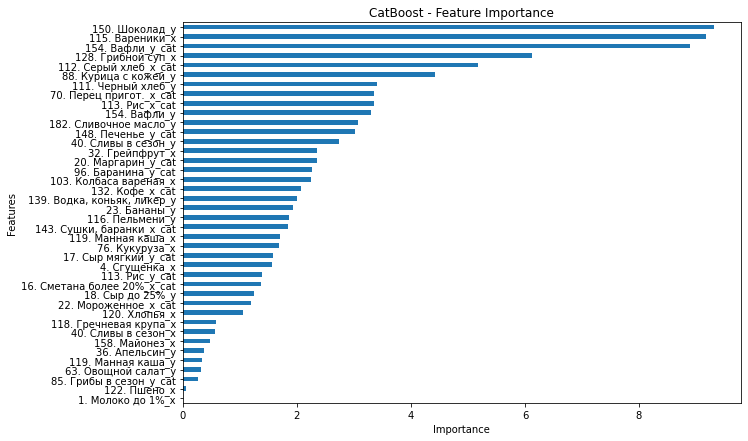

In [119]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-40:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');